In [1]:
using PolygonTriangulation, CairoMakie
include("../src/PolygonPlot.jl")
include("../src/EventPlot.jl")

eventFrame! (generic function with 8 methods)

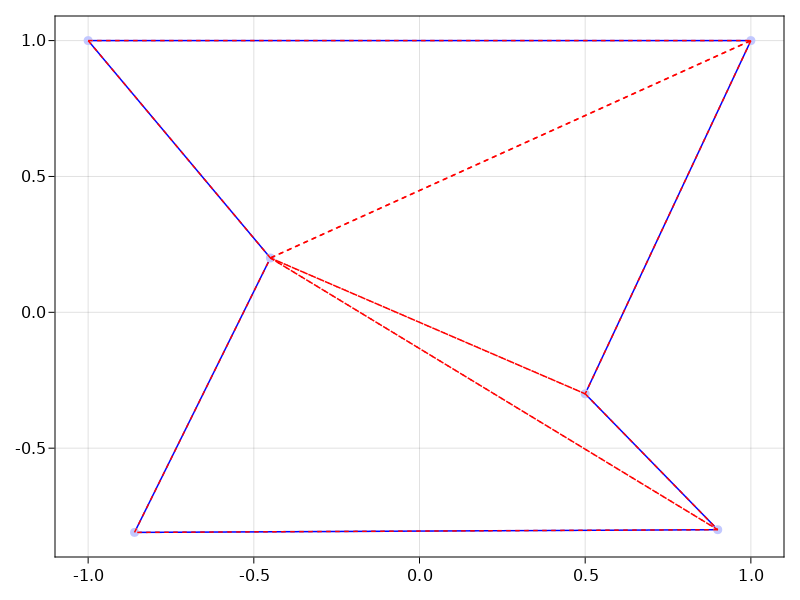

In [2]:
P = Polygon(
[
        Vertex(0.5,-0.3),
        Vertex(0.9,-0.8),
        Vertex(-0.86,-0.81),
        Vertex(-0.45,0.2),
        Vertex(-1.,1.),
        Vertex(1.,1.)
]
)

f = Figure()
polygonplot(f[1,1],P,triangulate(P))
f

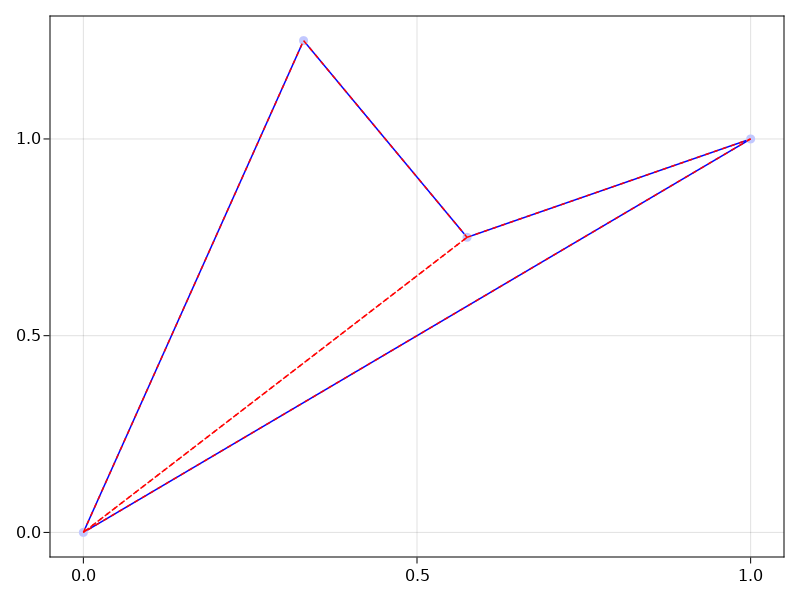

In [3]:
P = Polygon(
    [
        Vertex(0.0,0.0),
        Vertex(0.33,1.25),
        Vertex(0.575,0.75),
        Vertex(1.,1.)
    ]
)

f = Figure()
polygonplot(f[1,1],P,triangulate(P))
f

In [4]:
event = Vector{PolygonTriangulation.Event}([])
triangulate(P,event)
event

11-element Array{PolygonTriangulation.Event,1}:
 PolygonTriangulation.TestingVertexEvent(Vertex{Float64}(0.0, 0.0))
 PolygonTriangulation.BisectorEvent(Vertex{Float64}(0.0, 0.0), Vertex{Float64}(0.4984020823251929, 0.8669459985108137))
 PolygonTriangulation.IntersectionEvent(Vertex{Float64}(0.5088183516253713, 0.8850645885196504))
 PolygonTriangulation.TestingTriangleEvent(Vertex{Float64}(0.0, 0.0), Vertex{Float64}(0.5088183516253713, 0.8850645885196504), Vertex{Float64}(0.575, 0.75))
 PolygonTriangulation.FoundDiagonalEvent(Vertex{Float64}(0.0, 0.0), Vertex{Float64}(0.575, 0.75))
 PolygonTriangulation.GoodSubPolygonEvent(Polygon(Vertex[Vertex{Float64}(0.0, 0.0), Vertex{Float64}(0.33, 1.25), Vertex{Float64}(0.575, 0.75)]))
 PolygonTriangulation.TestingVertexEvent(Vertex{Float64}(0.33, 1.25))
 PolygonTriangulation.FoundEarEvent(Vertex{Float64}(0.33, 1.25))
 PolygonTriangulation.FoundTriangleEvent(Vertex{Float64}(0.0, 0.0), Vertex{Float64}(0.33, 1.25), Vertex{Float64}(0.575, 0.75))
 Poly

In [5]:
eventFrames(P,event)

"steps.gif"

In [6]:
function generatePolygon(n::Int)
    theta = 0.
    dtheta = 2.0*π/n

    v = []
    for i in 1:n
        rad = rand()*1. + 1.0
        push!(v,rad*Vertex(cos(theta),sin(theta)))
        theta+=dtheta
    end
    return Polygon(v|>reverse)
end

generatePolygon (generic function with 1 method)

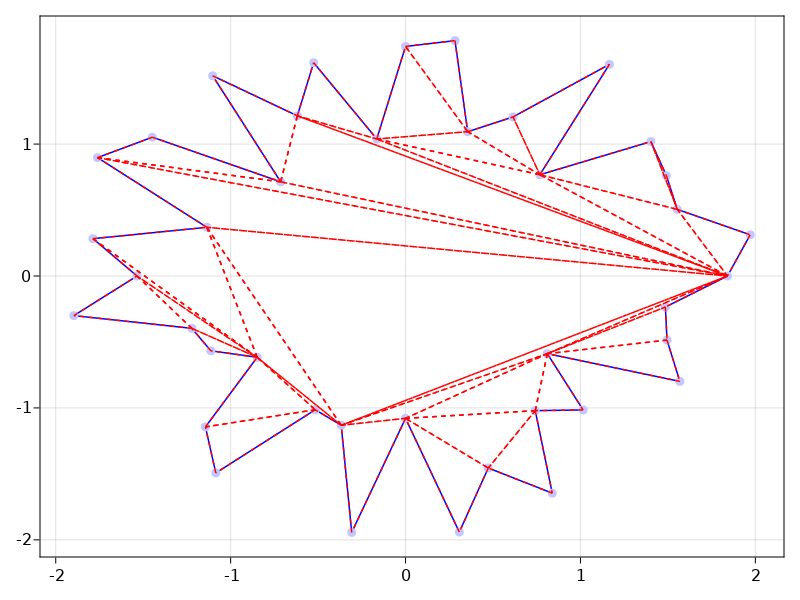

In [9]:
P = generatePolygon(40)
f = Figure()
event = Vector{PolygonTriangulation.Event}([])
polygonplot(f[1,1],P,triangulate(P))
f

In [17]:
N = 8
R = 3

times = zeros(N-1,R)

for n in 2:N
    for r in 1:R
        
        nv = 2^n
        p = generatePolygon(nv)
        
        times[n-1,r] = (@timed triangulate(p))[2]
    end
end

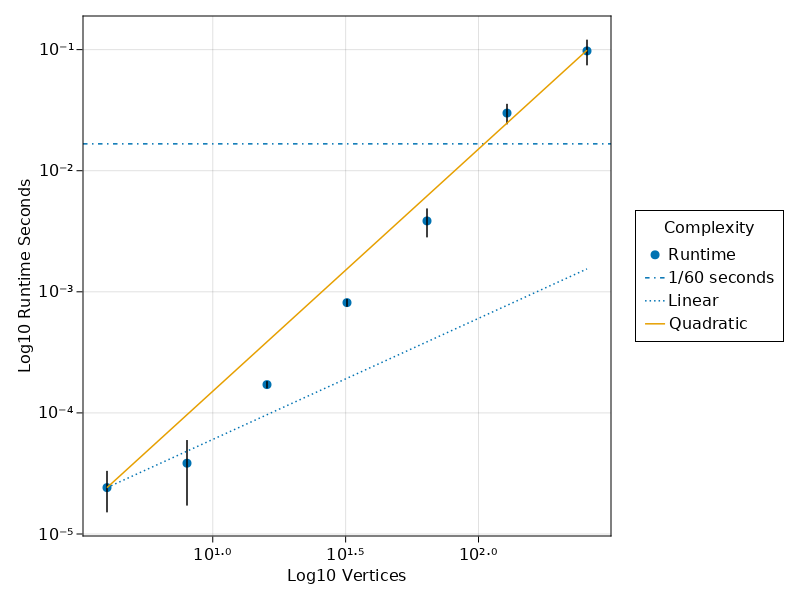

In [18]:
fig = Figure()
ax = Axis(fig[1,1],xscale=log10,yscale=log10,xlabel="Log10 Vertices",ylabel="Log10 Runtime Seconds")

using Statistics

μ = mean(times,dims=2)[:,1]
σ = std(times,dims=2)[:,1]
scatter!(ax,2 .^ collect(2:N),μ,label="Runtime")
errorbars!(ax,2 .^ collect(2:N),μ,σ./sqrt(R))
hlines!(ax,1.0/60.0,linestyle=:dashdot,label="1/60 seconds")
x = 2 .^ collect(2:N)
lines!(ax,x,(μ[1]/x[1]).*x,linestyle=:dot,label="Linear")
lines!(ax,x,(μ[1]/x[1]^2.).*x.^2.,label="Quadratic")
fig[1, 2] = Legend(fig, ax, "Complexity", framevisible = true)
save("complexity.png",fig)
fig